# FEM 1D 

## 1. Problem formulation
Find $u:I\to\mathbb{R}, \ I=[0,1]$ such that 
$$ -(K(x)u')'=f(x)$$
$$u(0)=0$$
$$u(1)=0$$
where 

$K(x)=1$ is the diffusion coefficienta

$f(x)=1$ is the source function


## Weak form
$$-(K(x)u',v')=(f(x),v)\ \forall v\in \mathcal{V}$$

## Numerical solution 

Matplotlib is building the font cache; this may take a moment.


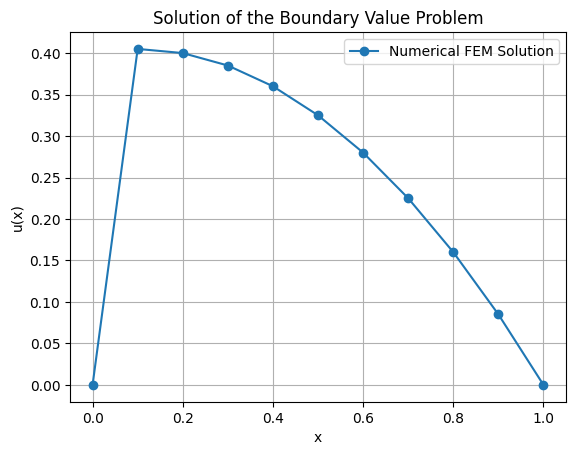

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the mesh
n_elements = 10
n_nodes = n_elements + 1
nodes = np.linspace(0, 1, n_nodes)
h = nodes[1] - nodes[0]

# Initialize stiffness matrix and load vector
K = np.zeros((n_nodes, n_nodes))
F = np.zeros(n_nodes)

# Assembly of the system
for i in range(1, n_elements):
    K_local = (1/h) * np.array([[1, -1], [-1, 1]])
    f_local = h/2 * np.array([1, 1])
    K[i:i+2, i:i+2] += K_local
    F[i:i+2] += f_local

# Apply boundary conditions
K[0, :] = K[:, 0] = K[-1, :] = K[:, -1] = 0
K[0, 0] = K[-1, -1] = 1
F[0] = F[-1] = 0

# Solve the linear system
u = np.linalg.solve(K, F)

# Plot the solution
plt.plot(nodes, u, '-o', label='Numerical FEM Solution')
plt.title('Solution of the Boundary Value Problem')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()
plt.show()

## Step 1: Problem Formulation

$$-\nabla \cdot (K \nabla u) + \beta \cdot \nabla u = 0$$

Where:

- u  is the concentration of the solute.	 

- K  is the diffusion coefficient, assumed constant.

- $\beta$  is the velocity vector, also assumed constant.
